 # Analysis of Transportation Network Companies (TNCs) and Taxis in Chicago
 ## Generating summary tables and graphs of the data
 This notebook generates summary tables and graphs from the selected Taxi and TNC data for Chicago. The starting datasets for this notebook were generated by selecting one week of trips for each dataset: for the TNCs the selected week is November 5 - November 11, 2019; for the taxi trips, the selected week is November 7 - November 13, 2016.

 A project by:<br><br>
 Juan Francisco Saldarriaga<br>
 Senior Data and Design Researcher<br>
 Brown Institute for Media Innovation<br>
 School of Journalism, Columbia University<br>
 jfs2118@columbia.edu<br>
 <br>
 and<br><br>
 David King<br>
 School of Geographical Sciences and Urban Planning<br>
 Faculty Advisor, Barrett Honors College<br>
 Arizona State University<br>
 david.a.king@asu.edu<br>

 The original data for this project can be found at:
 * Taxi trips: [Chicago Data Portal](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew), accessed on June 12, 2019.
 * TNC trips: [Chicago Data Portal](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p), accessed on April 26, 2019.

 **Importing libraries (Pandas, Numpy, Geopandas, Matplotlib, and Shapely)**

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

 **Setting global paths and filenames**

In [55]:
inputDataPath = '../input/'
outputDataPath = '../output/'
tncInputFileName = 'SelectedTNC_Trips_181105_181111.csv'
taxiInputFileName = 'SelectedTaxi_Trips_161107_161113.csv'
tncOutputFileName = 'SelectedTNC_Trips_181105_181111_Datetime.csv'
taxiOutputFileName = 'SelectedTaxi_Trips_161107_161113_Datetime.csv'

 **Loading and exploring TNC data**

In [3]:
tncData = pd.tncData = pd.read_csv(inputDataPath + tncInputFileName, delimiter=',', index_col=0)

/usr/local/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
tncData.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
1038,0000093625f90e660c8275040a7f57e335ae147b,11/10/2018 10:45:00 AM,11/10/2018 10:45:00 AM,314.0,1.2,1.703106e+10,1.703107e+10,6.0,7.0,5.0,...,2.50,7.50,False,1,41.936159,-87.661265,POINT (-87.6612652184 41.936159071),41.921701,-87.655912,POINT (-87.6559118484 41.9217014922)
1039,00000988893ef92c0d44374d79aef52631cb7087,11/11/2018 01:15:00 AM,11/11/2018 01:15:00 AM,105.0,0.7,1.703183e+10,1.703183e+10,22.0,22.0,2.5,...,2.50,5.00,False,1,41.919225,-87.671446,POINT (-87.671445766 41.9192250505),41.919225,-87.671446,POINT (-87.671445766 41.9192250505)
1041,0008f2d890c585c0729178d46bd0352ea8428b9a,11/07/2018 04:30:00 PM,11/07/2018 04:45:00 PM,1209.0,7.4,NaN,1.703157e+10,NaN,57.0,12.5,...,2.50,15.00,True,1,NaN,NaN,NaN,41.816264,-87.718927,POINT (-87.7189271854 41.8162644525)
1045,00131a71fdd0237dd323903986622464410f0200,11/07/2018 06:30:00 AM,11/07/2018 07:00:00 AM,1914.0,19.7,NaN,NaN,11.0,NaN,27.5,...,3.45,30.95,False,1,41.978830,-87.771167,POINT (-87.771166703 41.9788295262),NaN,NaN,NaN
1048,00164c1eb30516cbd645e04d044678b4e9f31bd2,11/06/2018 02:00:00 AM,11/06/2018 02:15:00 AM,434.0,1.7,NaN,NaN,NaN,25.0,5.0,...,2.50,7.50,False,1,NaN,NaN,NaN,41.890609,-87.756047,POINT (-87.7560467111 41.8906088526)


In [5]:
tncData.tail()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
17431970,fffe6e97132e6c727c0702fb37febabf9dd6bfec,11/06/2018 09:00:00 PM,11/06/2018 09:00:00 PM,57.0,0.3,NaN,NaN,28.0,28.0,0.0,...,2.5,2.5,True,1,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
17431994,ffff620bb8413cd21ecda2c007860db177ce260d,11/09/2018 08:00:00 PM,11/09/2018 08:30:00 PM,1031.0,4.4,NaN,NaN,NaN,11.0,10.0,...,2.5,12.5,True,1,NaN,NaN,NaN,41.978830,-87.771167,POINT (-87.771166703 41.9788295262)
17431999,ffffb0b495c0894f0f10333fc418454dee21fc13,11/08/2018 09:15:00 AM,11/08/2018 09:45:00 AM,1848.0,12.0,NaN,NaN,42.0,8.0,20.0,...,2.5,22.5,False,1,41.778877,-87.594925,POINT (-87.5949254391 41.7788768603),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
17432000,ffffb4b4c7c835bcb2ebc46f46a2a0e45bc36be9,11/10/2018 11:45:00 PM,11/11/2018 12:15:00 AM,2141.0,15.0,NaN,NaN,NaN,20.0,25.0,...,2.5,27.5,False,1,NaN,NaN,NaN,41.924347,-87.734740,POINT (-87.7347397536 41.9243470769)
17432010,fffffd66c52c5e40d1f2eed1fbf8aabcc61c39a0,11/11/2018 08:45:00 AM,11/11/2018 09:15:00 AM,1000.0,9.0,NaN,NaN,15.0,24.0,12.5,...,2.5,15.0,False,1,41.954028,-87.763399,POINT (-87.7633990316 41.9540276487),41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001)


In [6]:
tncData.shape

(2140207, 21)

In [7]:
tncData.dtypes

Trip ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tip                             int64
Additional Charges            float64
Trip Total                    float64
Shared Trip Authorized           bool
Trips Pooled                    int64
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid Location      object
dtype: object

 **Creating new fields of type `datetime` for start and end times**

In [8]:
# Transform fields to 'Datetime'
tncData['StartDateTime'] = pd.to_datetime(tncData['Trip Start Timestamp'])
tncData['EndDateTime'] = pd.to_datetime(tncData['Trip End Timestamp'])

In [9]:
tncData.dtypes

Trip ID                               object
Trip Start Timestamp                  object
Trip End Timestamp                    object
Trip Seconds                         float64
Trip Miles                           float64
Pickup Census Tract                  float64
Dropoff Census Tract                 float64
Pickup Community Area                float64
Dropoff Community Area               float64
Fare                                 float64
Tip                                    int64
Additional Charges                   float64
Trip Total                           float64
Shared Trip Authorized                  bool
Trips Pooled                           int64
Pickup Centroid Latitude             float64
Pickup Centroid Longitude            float64
Pickup Centroid Location              object
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
Dropoff Centroid Location             object
StartDateTime                 datetime64[ns]
EndDateTim

 **Generating summary statistics for TNC trips**

In [10]:
totalTNCRides = len(tncData)
print('Total TNC rides:', totalTNCRides)

Total TNC rides: 2140207


In [11]:
tncAvgFare = tncData['Fare'].mean()
tncMaxFare = tncData['Fare'].max()
tncMinFare = tncData['Fare'].min()
print('Average TNC fare:', tncAvgFare)
print('Maximum TNC fare:', tncMaxFare)
print('Minimum TNC fare:', tncMinFare)

Average TNC fare: 11.103463356581864
Maximum TNC fare: 1090.0
Minimum TNC fare: 0.0


In [12]:
tncAvgTip = tncData['Tip'].mean()
tncMaxTip = tncData['Tip'].max()
tncMinTip = tncData['Tip'].min()
print('Average TNC tip:', tncAvgTip)
print('Maximum TNC tip:', tncMaxTip)
print('Minimum TNC tip:', tncMinTip)

Average TNC tip: 0.5519667022862742
Maximum TNC tip: 100
Minimum TNC tip: 0


In [13]:
tncAvgTripTotal = tncData['Trip Total'].mean()
tncMaxTripTotal = tncData['Trip Total'].max()
tncMinTripTotal = tncData['Trip Total'].min()
print('Average TNC trip total:', tncAvgTripTotal)
print('Maximum TNC trip total:', tncMaxTripTotal)
print('Minimum TNC trip total:', tncMinTripTotal)

Average TNC trip total: 14.508187245439336
Maximum TNC trip total: 1092.05
Minimum TNC trip total: 0.0


In [14]:
tncAvgDistance = tncData['Trip Miles'].mean()
tncMaxDistance = tncData['Trip Miles'].max()
tncMinDistance = tncData['Trip Miles'].min()
print('Average TNC distance:', tncAvgDistance)
print('Maximum TNC distance:', tncMaxDistance)
print('Minimum TNC distance:', tncMinDistance)

Average TNC distance: 5.987792162160018
Maximum TNC distance: 389.9
Minimum TNC distance: 0.0


In [15]:
tncAvgDuration = tncData['Trip Seconds'].mean()
tncMaxDuration = tncData['Trip Seconds'].max()
tncMinDuration = tncData['Trip Seconds'].min()
print('Average TNC duration:', tncAvgDuration)
print('Maximum TNC duration:', tncMaxDuration)
print('Minimum TNC duration:', tncMinDuration)

Average TNC duration: 1099.0748530399162
Maximum TNC duration: 67560.0
Minimum TNC duration: 0.0


In [16]:
totalTNC_ridesPerDay = tncData.groupby(by=tncData['StartDateTime'].dt.date).count()['Trip ID']
print(totalTNC_ridesPerDay)

StartDateTime
2018-11-05    243582
2018-11-06    253651
2018-11-07    268917
2018-11-08    294292
2018-11-09    361842
2018-11-10    393377
2018-11-11    324546
Name: Trip ID, dtype: int64


In [17]:
tncFarePerDay = tncData.groupby(by=tncData['StartDateTime'].dt.date).agg({'Fare': [np.mean, np.min, np.max]})
print(tncFarePerDay)

                    Fare             
                    mean amin    amax
StartDateTime                        
2018-11-05     11.704210  0.0   377.5
2018-11-06     10.896862  0.0   452.5
2018-11-07     11.306425  0.0   400.0
2018-11-08     11.608360  0.0   325.0
2018-11-09     11.281250  0.0   447.5
2018-11-10     10.221187  0.0   682.5
2018-11-11     11.059226  0.0  1090.0


In [18]:
tncTipPerDay = tncData.groupby(by=tncData['StartDateTime'].dt.date).agg({'Tip': [np.mean, np.min, np.max]})
print(tncTipPerDay)

                    Tip          
                   mean amin amax
StartDateTime                    
2018-11-05     0.548062    0   99
2018-11-06     0.511951    0  100
2018-11-07     0.566145    0   60
2018-11-08     0.598932    0   70
2018-11-09     0.561585    0   50
2018-11-10     0.504458    0   84
2018-11-11     0.578698    0  100


In [19]:
tncTripTotalPerDay = tncData.groupby(by=tncData['StartDateTime'].dt.date).agg({'Trip Total': [np.mean, np.min, np.max]})
print(tncTripTotalPerDay)

              Trip Total               
                    mean  amin     amax
StartDateTime                          
2018-11-05     15.336143  0.67   412.50
2018-11-06     14.268547  0.67   456.50
2018-11-07     14.750004  0.67   408.50
2018-11-08     15.146948  0.67   328.40
2018-11-09     14.712904  0.67   459.35
2018-11-10     13.359742  0.00   696.40
2018-11-11     14.458259  0.67  1092.05


In [20]:
tncDistancePerDay = tncData.groupby(by=tncData['StartDateTime'].dt.date).agg({'Trip Miles': [np.mean, np.min, np.max]})
print(tncDistancePerDay)

              Trip Miles            
                    mean amin   amax
StartDateTime                       
2018-11-05      6.601946  0.0  316.5
2018-11-06      6.055546  0.0  389.9
2018-11-07      6.178317  0.0  202.1
2018-11-08      6.207602  0.0  207.5
2018-11-09      5.811579  0.0  296.7
2018-11-10      5.332531  0.0  320.6
2018-11-11      6.107406  0.0  261.0


In [21]:
tncDurationPerDay = tncData.groupby(by=tncData['StartDateTime'].dt.date).agg({'Trip Seconds': [np.mean, np.min, np.max]})
print(tncDurationPerDay)

              Trip Seconds              
                      mean amin     amax
StartDateTime                           
2018-11-05     1159.344537  3.0  20948.0
2018-11-06     1114.189816  0.0  28704.0
2018-11-07     1152.315900  0.0  34877.0
2018-11-08     1188.777228  0.0  26760.0
2018-11-09     1150.038940  0.0  67560.0
2018-11-10      982.680975  0.0  17358.0
2018-11-11     1000.830160  0.0  26346.0


In [22]:
dateRange = pd.date_range(start='2018-11-05', end='2018-11-11')
for date in dateRange:
    tncTripsThisDay = tncData[(tncData['StartDateTime'] >= date) & (tncData['StartDateTime'] < (date + pd.DateOffset(1)))]
    tripsPerHour = tncTripsThisDay['Trip ID'].groupby(by=tncTripsThisDay['StartDateTime'].dt.hour).count()
    print('Peak hour for', date, 'is', tripsPerHour.idxmax(), 'with', tripsPerHour[tripsPerHour.idxmax()], 'trips.')

Peak hour for 2018-11-05 00:00:00 is 17 with 14965 trips.
Peak hour for 2018-11-06 00:00:00 is 17 with 16668 trips.
Peak hour for 2018-11-07 00:00:00 is 17 with 17425 trips.
Peak hour for 2018-11-08 00:00:00 is 18 with 19135 trips.
Peak hour for 2018-11-09 00:00:00 is 19 with 24030 trips.
Peak hour for 2018-11-10 00:00:00 is 23 with 24810 trips.
Peak hour for 2018-11-11 00:00:00 is 0 with 23157 trips.


 **Loading and exploring Taxi data**

In [23]:
taxiData = pd.read_csv(inputDataPath + taxiInputFileName, delimiter=',', index_col=0)

In [24]:
taxiData.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,493d28d1aef5aaf0764ea3192d92090ac75121ed,ff214d6d48867d32b43c8caf27613acc83d3a03a290c37...,11/08/2016 03:15:00 PM,10/11/2016 06:00:00 AM,NaN,3.4,NaN,NaN,6.0,8.0,...,0.0,18.0,Credit Card,Taxi Affiliation Services,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
305643,eb810f6b891baa03fe6684c798b5c8a1a9bda143,8b518cb35743db24b2498b46d3eb2e89321a5f26a4601f...,11/07/2016 12:00:00 AM,11/07/2016 12:00:00 AM,0.0,0.8,1.703108e+10,1.703108e+10,8.0,8.0,...,4.0,44.4,Credit Card,Taxi Affiliation Services,41.892073,-87.628874,POINT (-87.6288741572 41.8920726347),41.892073,-87.628874,POINT (-87.6288741572 41.8920726347)
305644,3f205337b016faad57fe90288c05814bd5ecfac1,d38890256d8a1e8146f0b15dc23e3b2a140b4fa3834698...,11/07/2016 12:00:00 AM,11/07/2016 12:00:00 AM,180.0,0.5,NaN,NaN,6.0,6.0,...,0.0,4.5,Cash,Taxi Affiliation Services,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
305645,d97eb24911ebd9a9a1bb7f1c771ad963a09256dd,29f6d119e21d61401aa5156346aca14fad3d0fea0dc1c8...,11/07/2016 12:00:00 AM,11/07/2016 12:00:00 AM,300.0,0.8,NaN,NaN,32.0,32.0,...,0.0,5.5,Cash,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.878866,-87.625192,POINT (-87.6251921424 41.8788655841)
305652,3c18e189acc6b1a86e143e5b97a6ee4ae6d8906b,fdd5ae66de73dcf0baaf4a768c182b0c9e0579643672c0...,11/07/2016 12:00:00 AM,11/07/2016 12:00:00 AM,301.0,1.1,1.703108e+10,1.703132e+10,8.0,32.0,...,1.5,7.5,Cash,NaN,41.892073,-87.628874,POINT (-87.6288741572 41.8920726347),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)


In [25]:
taxiData.tail()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
1296063,62d526e28631c24e3c63a4cac32bc5068433a9f6,2a0dffcdb837d73460febb3e3882633bba0563b966825a...,11/11/2016 10:00:00 AM,NaN,NaN,0.0,1.703184e+10,NaN,32.0,NaN,...,0.0,0.0,Unknown,Chicago Medallion Management,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),NaN,NaN,NaN
1296067,6f2c440efc684c18966fc8fa930ae2fa54b593da,2a0dffcdb837d73460febb3e3882633bba0563b966825a...,11/12/2016 03:00:00 PM,NaN,NaN,0.0,1.703108e+10,NaN,8.0,NaN,...,0.0,0.0,Unknown,Chicago Medallion Management,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),NaN,NaN,NaN
1296070,559d7e545c8794dd75480c7c8838c5d7a91f40dd,2a0dffcdb837d73460febb3e3882633bba0563b966825a...,11/08/2016 06:00:00 PM,NaN,NaN,0.0,1.703108e+10,NaN,8.0,NaN,...,0.0,0.0,Unknown,Chicago Medallion Management,41.902788,-87.626146,POINT (-87.6261455896 41.9027880476),NaN,NaN,NaN
1296076,5275a3e55cbb1c095c087a3cff5082dba462281c,2a0dffcdb837d73460febb3e3882633bba0563b966825a...,11/13/2016 04:45:00 AM,NaN,NaN,0.0,1.703106e+10,NaN,6.0,NaN,...,0.0,0.0,Unknown,Chicago Medallion Management,41.949140,-87.656804,POINT (-87.6568039088 41.9491397709),NaN,NaN,NaN
1296082,4f3ee987e0f66e3fe7d257a4146a0123df773908,2a0dffcdb837d73460febb3e3882633bba0563b966825a...,11/12/2016 01:00:00 AM,NaN,NaN,0.0,1.703183e+10,NaN,28.0,NaN,...,0.0,0.0,Unknown,Chicago Medallion Management,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),NaN,NaN,NaN


In [26]:
taxiData.shape

(321107, 23)

In [27]:
taxiData.dtypes

Trip ID                        object
Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                   object
Company                        object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

 **Creating new fields of type `datetime` for start and end times**

In [28]:
# Transform fields to 'Datetime'
taxiData['StartDateTime'] = pd.to_datetime(taxiData['Trip Start Timestamp'])
taxiData['EndDateTime'] = pd.to_datetime(taxiData['Trip End Timestamp'])

In [29]:
taxiData.dtypes

Trip ID                               object
Taxi ID                               object
Trip Start Timestamp                  object
Trip End Timestamp                    object
Trip Seconds                         float64
Trip Miles                           float64
Pickup Census Tract                  float64
Dropoff Census Tract                 float64
Pickup Community Area                float64
Dropoff Community Area               float64
Fare                                 float64
Tips                                 float64
Tolls                                float64
Extras                               float64
Trip Total                           float64
Payment Type                          object
Company                               object
Pickup Centroid Latitude             float64
Pickup Centroid Longitude            float64
Pickup Centroid Location              object
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
Dropoff Ce

 **Generating summary statistics for Taxi trips**

In [30]:
totalTaxiRides = len(taxiData)
print('Total Taxi rides:', totalTaxiRides)

Total Taxi rides: 321107


In [31]:
taxiAvgFare = taxiData['Fare'].mean()
taxiMaxFare = taxiData['Fare'].max()
taxiMinFare = taxiData['Fare'].min()
print('Average Taxi fare:', taxiAvgFare)
print('Maximum Taxi fare:', taxiMaxFare)
print('Minimum Taxi fare:', taxiMinFare)

Average Taxi fare: 14.372182819842854
Maximum Taxi fare: 6666.66
Minimum Taxi fare: 0.0


In [32]:
taxiAvgTip = taxiData['Tips'].mean()
taxiMaxTip = taxiData['Tips'].max()
taxiMinTip = taxiData['Tips'].min()
print('Average Taxi tip:', taxiAvgTip)
print('Maximum Taxi tip:', taxiMaxTip)
print('Minimum Taxi tip:', taxiMinTip)

Average Taxi tip: 1.7897369691345153
Maximum Taxi tip: 120.0
Minimum Taxi tip: 0.0


In [33]:
taxiAvgTripTotal = taxiData['Trip Total'].mean()
taxiMaxTripTotal = taxiData['Trip Total'].max()
taxiMinTripTotal = taxiData['Trip Total'].min()
print('Average Taxi trip total:', taxiAvgTripTotal)
print('Maximum Taxi trip total:', taxiMaxTripTotal)
print('Minimum Taxi trip total:', taxiMinTripTotal)

Average Taxi trip total: 17.40487619237441
Maximum Taxi trip total: 6666.66
Minimum Taxi trip total: 0.0


In [34]:
taxiAvgDistance = taxiData['Trip Miles'].mean()
taxiMaxDistance = taxiData['Trip Miles'].max()
taxiMinDistance = taxiData['Trip Miles'].min()
print('Average Taxi distance:', taxiAvgDistance)
print('Maximum Taxi distance:', taxiMaxDistance)
print('Minimum Taxi distance:', taxiMinDistance)

Average Taxi distance: 3.3743434837311272
Maximum Taxi distance: 460.7
Minimum Taxi distance: 0.0


In [35]:
taxiAvgDuration = taxiData['Trip Seconds'].mean()
taxiMaxDuration = taxiData['Trip Seconds'].max()
taxiMinDuration = taxiData['Trip Seconds'].min()
print('Average Taxi duration:', taxiAvgDuration)
print('Maximum Taxi duration:', taxiMaxDuration)
print('Minimum Taxi duration:', taxiMinDuration)

Average Taxi duration: 870.3560553676328
Maximum Taxi duration: 86392.0
Minimum Taxi duration: 0.0


In [36]:
totalTaxi_ridesPerDay = taxiData.groupby(by=taxiData['StartDateTime'].dt.date).count()['Trip ID']
print(totalTaxi_ridesPerDay)

StartDateTime
2016-11-07    47160
2016-11-08    48594
2016-11-09    50931
2016-11-10    51010
2016-11-11    50185
2016-11-12    40042
2016-11-13    33185
Name: Trip ID, dtype: int64


In [37]:
taxiFarePerDay = taxiData.groupby(by=taxiData['StartDateTime'].dt.date).agg({'Fare': [np.mean, np.min, np.max]})
print(taxiFarePerDay)

                    Fare              
                    mean amin     amax
StartDateTime                         
2016-11-07     14.679623  0.0   600.00
2016-11-08     13.986207  0.0   884.48
2016-11-09     15.324253  0.0  1025.11
2016-11-10     14.717490  0.0  6666.66
2016-11-11     13.973449  0.0  5135.25
2016-11-12     12.254920  0.0   999.99
2016-11-13     15.666221  0.0   999.99


In [39]:
taxiTipPerDay = taxiData.groupby(by=taxiData['StartDateTime'].dt.date).agg({'Tips': [np.mean, np.min, np.max]})
print(taxiTipPerDay)

                   Tips            
                   mean amin   amax
StartDateTime                      
2016-11-07     1.857991  0.0  100.0
2016-11-08     1.858960  0.0  120.0
2016-11-09     2.089284  0.0   75.0
2016-11-10     1.914723  0.0  100.0
2016-11-11     1.700138  0.0  120.0
2016-11-12     1.204309  0.0   50.0
2016-11-13     1.781412  0.0   70.0


In [40]:
tncTripTotalPerDay = tncData.groupby(by=tncData['StartDateTime'].dt.date).agg({'Trip Total': [np.mean, np.min, np.max]})
print(tncTripTotalPerDay)

              Trip Total               
                    mean  amin     amax
StartDateTime                          
2018-11-05     15.336143  0.67   412.50
2018-11-06     14.268547  0.67   456.50
2018-11-07     14.750004  0.67   408.50
2018-11-08     15.146948  0.67   328.40
2018-11-09     14.712904  0.67   459.35
2018-11-10     13.359742  0.00   696.40
2018-11-11     14.458259  0.67  1092.05


In [41]:
tncDistancePerDay = tncData.groupby(by=tncData['StartDateTime'].dt.date).agg({'Trip Miles': [np.mean, np.min, np.max]})
print(tncDistancePerDay)

              Trip Miles            
                    mean amin   amax
StartDateTime                       
2018-11-05      6.601946  0.0  316.5
2018-11-06      6.055546  0.0  389.9
2018-11-07      6.178317  0.0  202.1
2018-11-08      6.207602  0.0  207.5
2018-11-09      5.811579  0.0  296.7
2018-11-10      5.332531  0.0  320.6
2018-11-11      6.107406  0.0  261.0


In [42]:
tncDurationPerDay = tncData.groupby(by=tncData['StartDateTime'].dt.date).agg({'Trip Seconds': [np.mean, np.min, np.max]})
print(tncDurationPerDay)

              Trip Seconds              
                      mean amin     amax
StartDateTime                           
2018-11-05     1159.344537  3.0  20948.0
2018-11-06     1114.189816  0.0  28704.0
2018-11-07     1152.315900  0.0  34877.0
2018-11-08     1188.777228  0.0  26760.0
2018-11-09     1150.038940  0.0  67560.0
2018-11-10      982.680975  0.0  17358.0
2018-11-11     1000.830160  0.0  26346.0


In [43]:
dateRange = pd.date_range(start='2016-11-07', end='2016-11-13')
for date in dateRange:
    taxiTripsThisDay = taxiData[(taxiData['StartDateTime'] >= date) & (taxiData['StartDateTime'] < (date + pd.DateOffset(1)))]
    tripsPerHour = taxiTripsThisDay['Trip ID'].groupby(by=taxiTripsThisDay['StartDateTime'].dt.hour).count()
    print('Peak hour for', date, 'is', tripsPerHour.idxmax(), 'with', tripsPerHour[tripsPerHour.idxmax()], 'trips.')

Peak hour for 2016-11-07 00:00:00 is 18 with 3563 trips.
Peak hour for 2016-11-08 00:00:00 is 18 with 3478 trips.
Peak hour for 2016-11-09 00:00:00 is 18 with 3233 trips.
Peak hour for 2016-11-10 00:00:00 is 18 with 3643 trips.
Peak hour for 2016-11-11 00:00:00 is 18 with 3670 trips.
Peak hour for 2016-11-12 00:00:00 is 19 with 2831 trips.
Peak hour for 2016-11-13 00:00:00 is 0 with 2659 trips.


**Generating weekly and daily graphs for each dataset and combined**

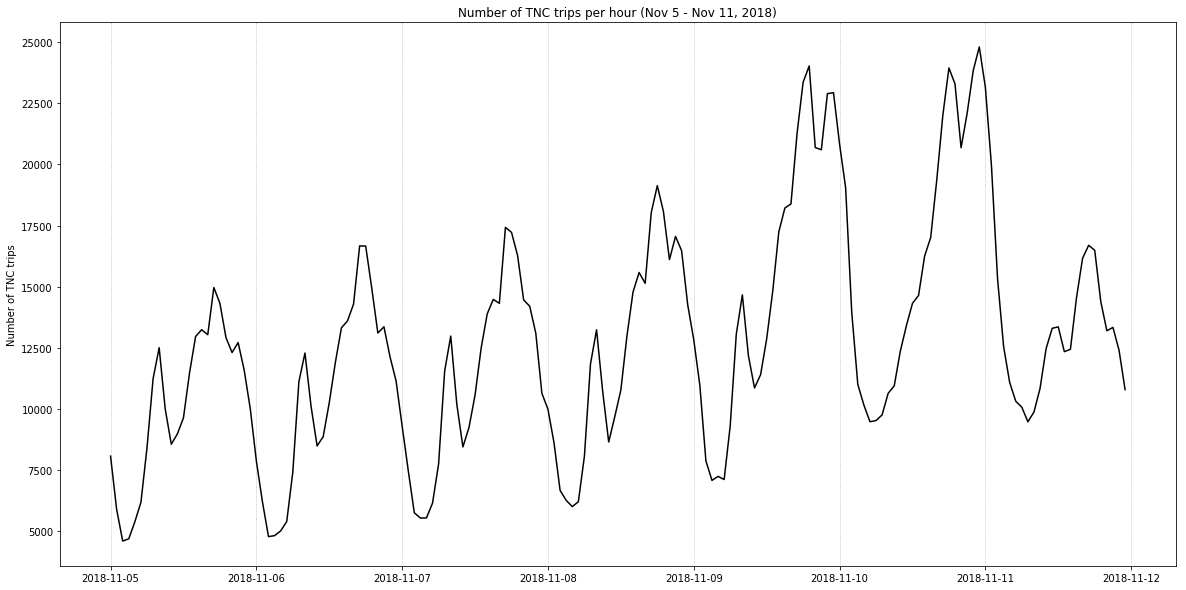

In [49]:
tncTripsByHour = tncData.resample('H', on='StartDateTime').count()
plt.rcParams["figure.figsize"] = [20,10]
fig = plt.figure()
ax = plt.axes()
ax.xaxis.grid(linestyle=':')
plt.ylabel('Number of TNC trips')
plt.title('Number of TNC trips per hour (Nov 5 - Nov 11, 2018)')
ax.plot(tncTripsByHour['Trip ID'], color='black')

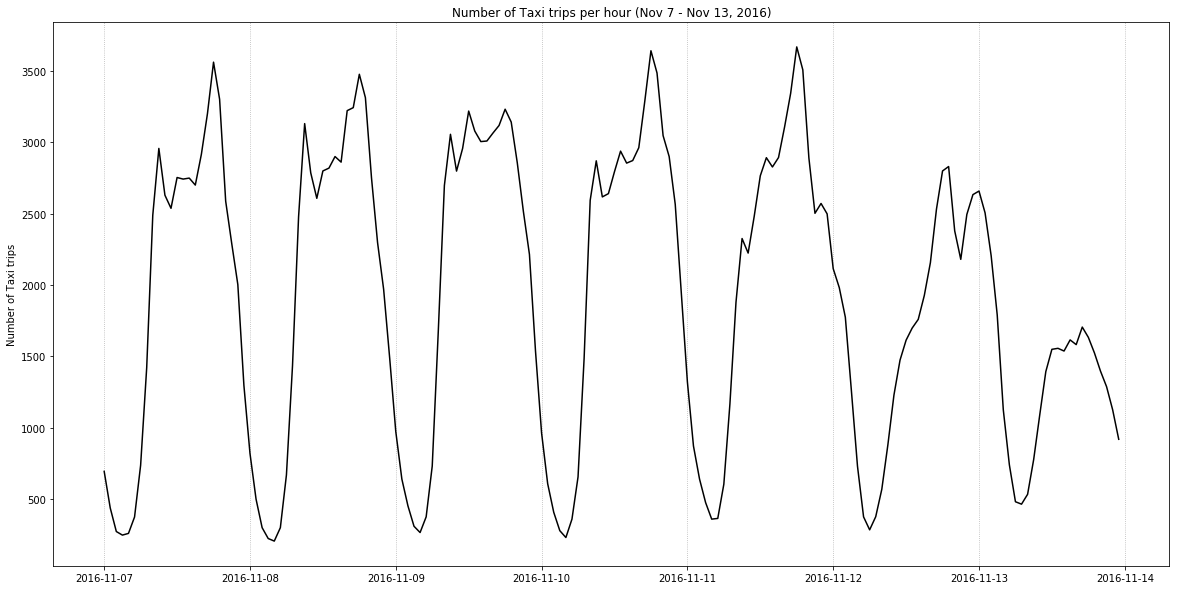

In [50]:
taxiTripsByHour = taxiData.resample('H', on='StartDateTime').count()
plt.rcParams["figure.figsize"] = [20,10]
fig = plt.figure()
ax = plt.axes()
ax.xaxis.grid(linestyle=':')
plt.ylabel('Number of Taxi trips')
plt.title('Number of Taxi trips per hour (Nov 7 - Nov 13, 2016)')
ax.plot(taxiTripsByHour['Trip ID'], color='black')

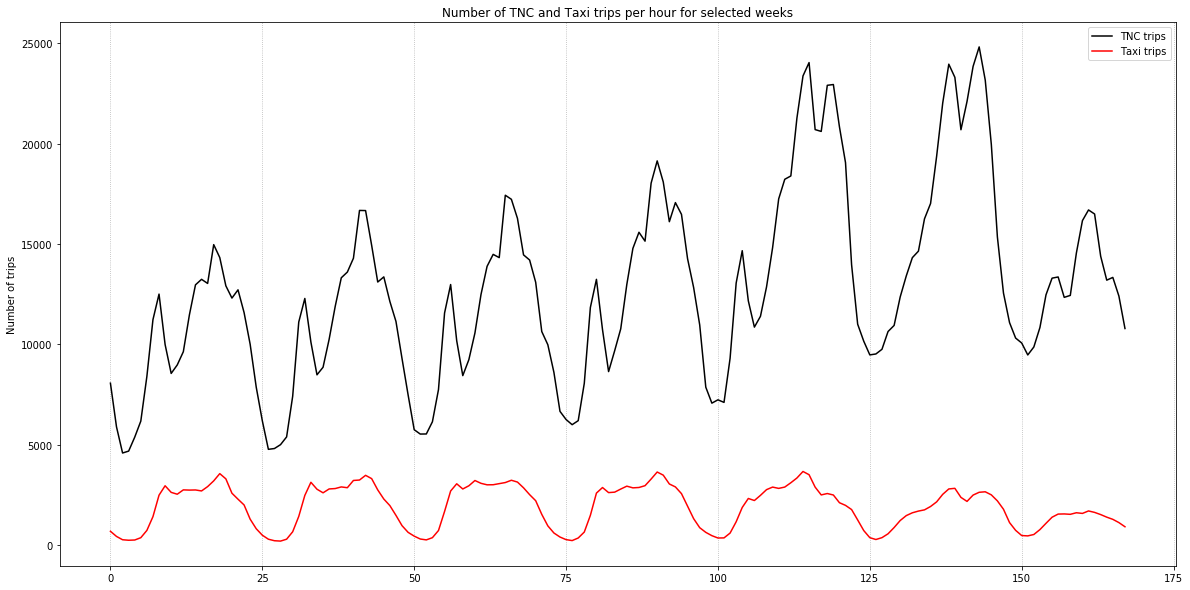

In [54]:
hourlyTNC = tncTripsByHour.reset_index(drop=True)
hourlyTaxi = taxiTripsByHour.reset_index(drop=True)
fig = plt.figure()
ax = plt.axes()
ax.xaxis.grid(linestyle=':')
plt.ylabel('Number of trips')
plt.title('Number of TNC and Taxi trips per hour for selected weeks')
ax.plot(hourlyTNC['Trip ID'], color='black', label='TNC trips')
ax.plot(hourlyTaxi['Trip ID'], color='red', label='Taxi trips')
ax.legend()

**Exporting files with `datetime` fields**

In [56]:
tncData.to_csv(outputDataPath + tncOutputFileName)
taxiData.to_csv(outputDataPath + taxiOutputFileName)